# TS-Diagram with water mass annotation

In [1]:
import gsw
import numpy as np

Te = np.linspace(0, 13, 25)
Se = np.linspace(34.4, 35.4, 25)

Tg, Sg = np.meshgrid(Te, Se)
sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 10)

In [2]:
import pandas as pd

df = pd.read_csv('data/water_mass.csv', index_col='p')
df

,SP,CT
p,,
0.0,35.239437,12.669123
20.0,35.265523,12.557223
50.0,35.294104,12.129957
100.0,35.301038,11.044503
150.0,35.222396,10.271577
250.0,34.935177,8.331906
400.0,34.716915,6.418602
600.0,34.514237,4.232079
800.0,34.461589,3.018598


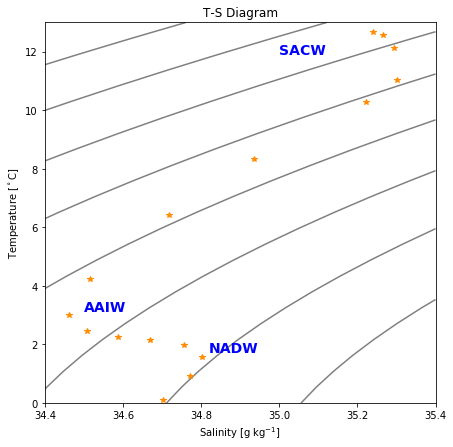

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


fig, ax = plt.subplots(figsize=(7, 7))

cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', levels=cnt, zorder=1)
kw = dict(color='blue', fontsize=14, fontweight='black')
ax.text(35.00, 11.9, 'SACW', **kw)
ax.text(34.50, 3.12, 'AAIW', **kw)
ax.text(34.82, 1.72, 'NADW', **kw)

kw = dict(color='darkorange', linestyle="none", marker='*')
ax.plot(df['SP'], df['CT'], **kw)
ax.set_xlabel('Salinity [g kg$^{-1}$]')
ax.set_ylabel('Temperature [$^\circ$C]')
ax.set_title('T-S Diagram')
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))